In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

from lib import *

%matplotlib inline

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:
- сохраненные маски для картинок из valid в формате pred_valid_template.csv (в архиве с `data`);
- html страницу с предсказанием модели для всех картинок из test и папку с используемыми картинками в этой html странице для её просмотра.

Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (в jupyter ноутбуке) с описанием Вашего исследования, предобработки, постобработки, проверямых гипотез, используемых моделей, описание лучшего подхода и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

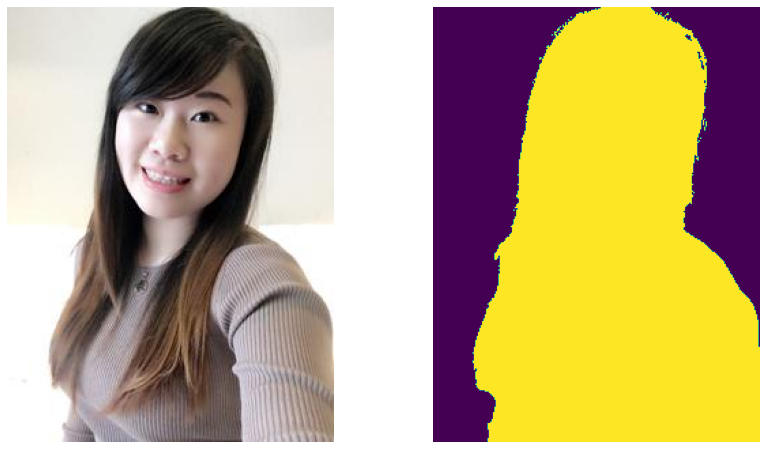

In [2]:
path = "./data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show_img_with_mask(img, mask)

In [3]:
mask.shape

(320, 240)

Пример подсчета метрики:

In [4]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.5635274481560228

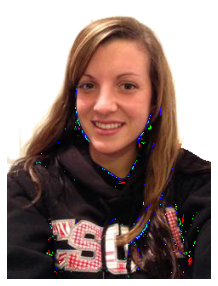

In [4]:
import cv2

image = cv2.imread(f"{path}/{ind}.jpg")
mask = cv2.imread(f"{path}_mask/{ind}.png")
img = cv2.cvtColor(cv2.bitwise_and(image, mask), cv2.COLOR_BGR2RGB)
im_pil = np.array(Image.fromarray(img))
im_pil[im_pil == 0] = 255
plt.figure(figsize=(12, 5))
plt.axis('off')
plt.imshow(im_pil);

Можно для последовательности масок вычислить среднее значение метрики:

In [6]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.5003758237418902

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [7]:
rle_mask = encode_rle(mask)
rle_mask

'46 162 285 164 525 165 764 166 1003 167 1242 169 1480 172 1719 172 1959 172 2198 174 2436 175 2677 176 2917 176 3156 176 3394 1 3396 178 3632 2 3635 181 3870 3 3874 182 4110 2 4115 181 4347 4 4354 183 4586 5 4593 183 4826 192 5066 192 5305 198 5545 198 5785 198 5984 1 6026 199 6265 203 6503 206 6741 209 6978 213 7218 215 7457 216 7696 219 7934 222 8174 223 8414 225 8653 226 8893 227 9138 223 9379 222 9619 222 9859 222 10099 222 10340 221 10581 220 10821 220 11060 221 11302 219 11541 220 11781 220 12020 221 12259 222 12498 223 12737 224 12976 225 13216 225 13455 226 13694 227 13934 227 14174 227 14414 227 14653 228 14893 228 15134 227 15373 228 15613 228 15853 228 16093 228 16330 231 16570 231 16809 232 17049 232 17290 231 17527 2 17530 231 17765 236 18004 237 18244 237 18483 238 18724 237 18965 236 19209 232 19449 232 19685 236 19923 238 20164 237 20405 236 20645 236 20889 232 21129 232 21368 233 21608 1 21610 231 21848 1 21851 230 22092 229 22333 228 22574 227 22810 2 22814 227 23051

Теперь восстановим маску:

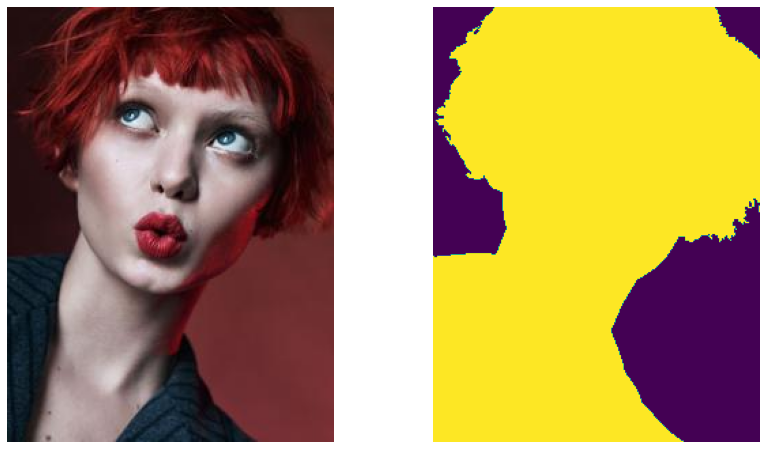

In [8]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [9]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [1]:
# paths_to_imgs = sorted(glob("data/valid/*"))
# pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

# _ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.